In [5]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def parse_csvs(experiment_name):
    all_dfs = []
    for dir in os.listdir("results"):
        if dir.startswith(experiment_name):
            file = os.path.join("results", dir, "results.csv")
            df = pd.read_csv(file)
            all_dfs.append(df)
    return all_dfs


# Create re-usable function for below plotting style:
def plot_seeded_results(name, title):
    # Create a new figure for the average plot
    plt.figure(figsize=(15, 6))

    dfs = parse_csvs(name)

    for df in dfs:
        plt.plot(df["step"], df["avg_score"])

    plt.title(title)
    plt.xlabel("Training Steps")
    plt.ylabel("Average Score")
    plt.legend()
    plt.show()


def plot_average(name, title):
    plt.figure(figsize=(15, 6))

    dfs = parse_csvs(name)

    # Group by step and calculate mean
    combined_df = pd.concat(dfs)
    avg_df = combined_df.groupby("step").mean().reset_index()

    # Now step is a column again after reset_index()
    plt.plot(avg_df["step"], avg_df["avg_score"], "r-", linewidth=3)

    # Optional: Add standard deviation
    std_df = combined_df.groupby("step").std().reset_index()
    plt.fill_between(
        avg_df["step"],
        avg_df["avg_score"] - std_df["avg_score"],
        avg_df["avg_score"] + std_df["avg_score"],
        color="r",
        alpha=0.2,
        label="±1 std dev",
    )

    plt.title(title)
    plt.xlabel("Training Steps")
    plt.ylabel("Average Score")
    plt.legend()
    plt.show()


def plot_multiple_averages(names, title):
    plt.figure(figsize=(15, 6))

    def plot_average(all_dfs, color, label):
        # Group by step and calculate mean
        combined_df = pd.concat(all_dfs)
        avg_df = combined_df.groupby("step").mean().reset_index()

        # Now step is a column again after reset_index()
        plt.plot(
            avg_df["step"], avg_df["avg_score"], color + "-", linewidth=3, label=label
        )

        # Optional: Add standard deviation
        std_df = combined_df.groupby("step").std().reset_index()
        plt.fill_between(
            avg_df["step"],
            avg_df["avg_score"] - std_df["avg_score"],
            avg_df["avg_score"] + std_df["avg_score"],
            color=color,
            alpha=0.2,
            label="±1 std dev",
        )

    colors = ["r", "b", "g", "y", "m", "c", "k"]
    for name, color in zip(names, colors):
        dfs = parse_csvs(name)
        plot_average(dfs, color, name)

    plt.title(title)
    plt.xlabel("Training Steps")
    plt.ylabel("Average Score")
    plt.legend()
    plt.show()


/var/folders/q4/2lsmb6qd1ks8137720rg8fz80000gn/T/ipykernel_38391/3440463019.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


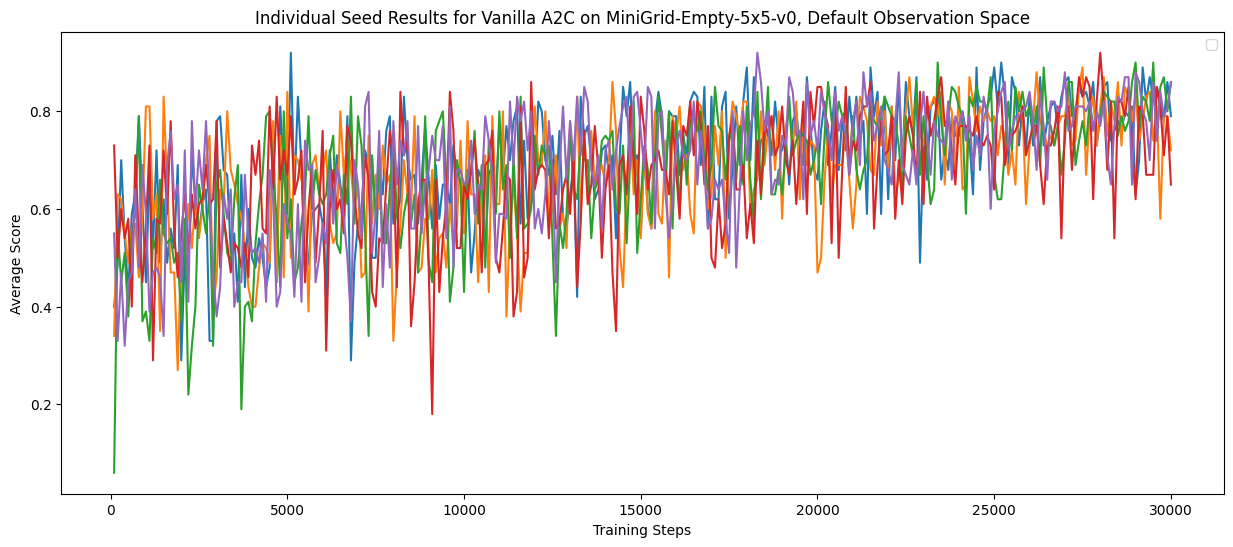

In [28]:
plot_seeded_results(
    "vanilla_original_16_processes",
    "Individual Seed Results for Vanilla A2C on MiniGrid-Empty-5x5-v0, Default Observation Space",
)

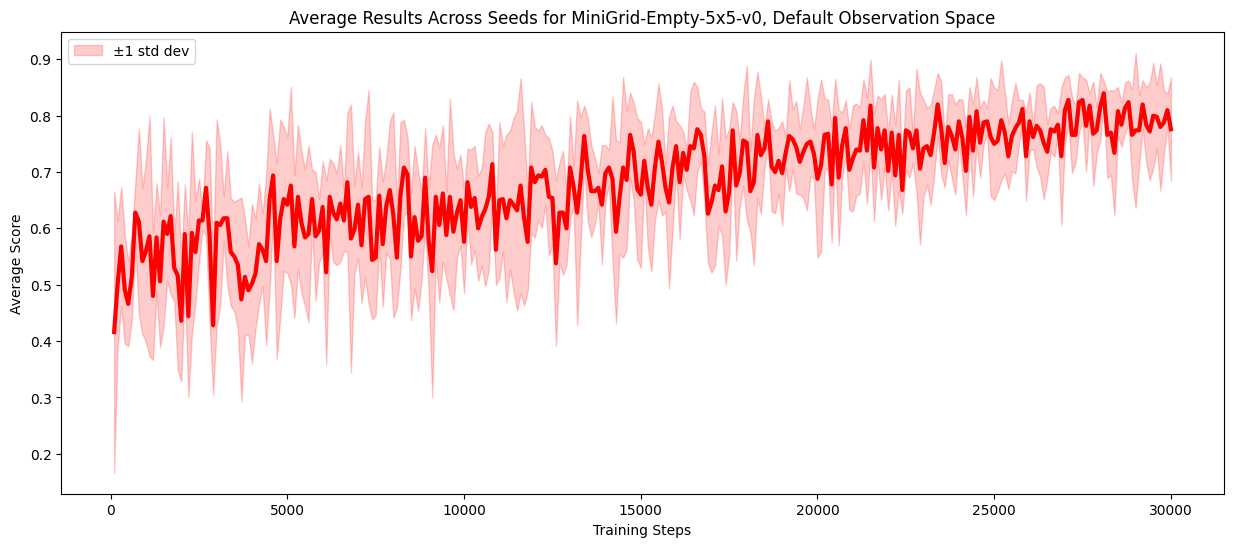

In [29]:
plot_average(
    "vanilla_original_16_processes",
    "Average Results Across Seeds for MiniGrid-Empty-5x5-v0, Default Observation Space",
)

/var/folders/q4/2lsmb6qd1ks8137720rg8fz80000gn/T/ipykernel_38391/3440463019.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


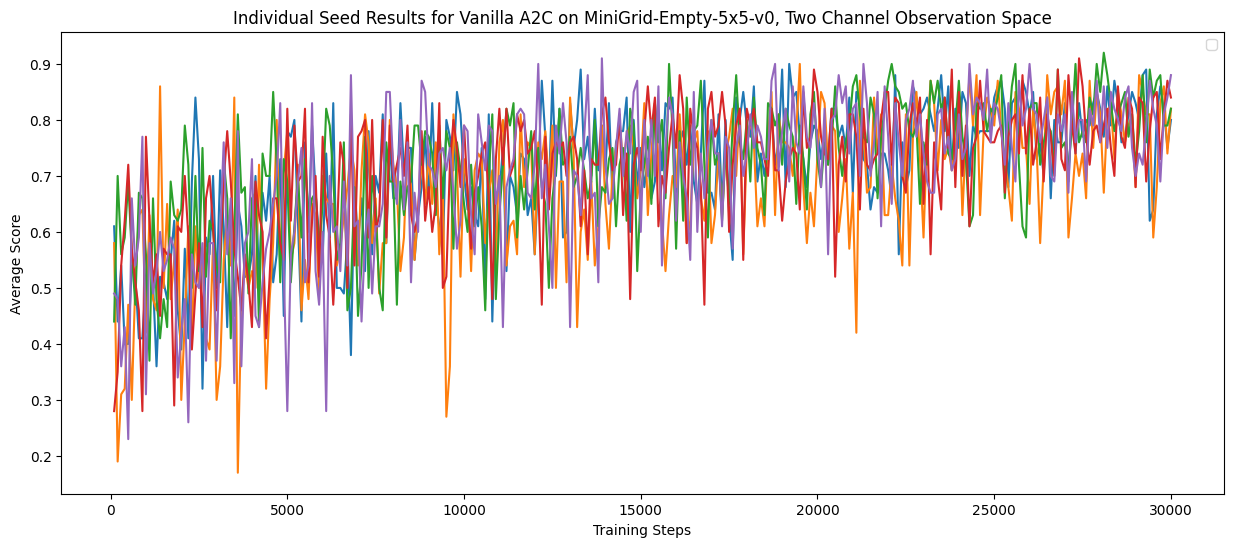

In [30]:
plot_seeded_results(
    "vanilla_two_channel_16_processes",
    "Individual Seed Results for Vanilla A2C on MiniGrid-Empty-5x5-v0, Two Channel Observation Space",
)


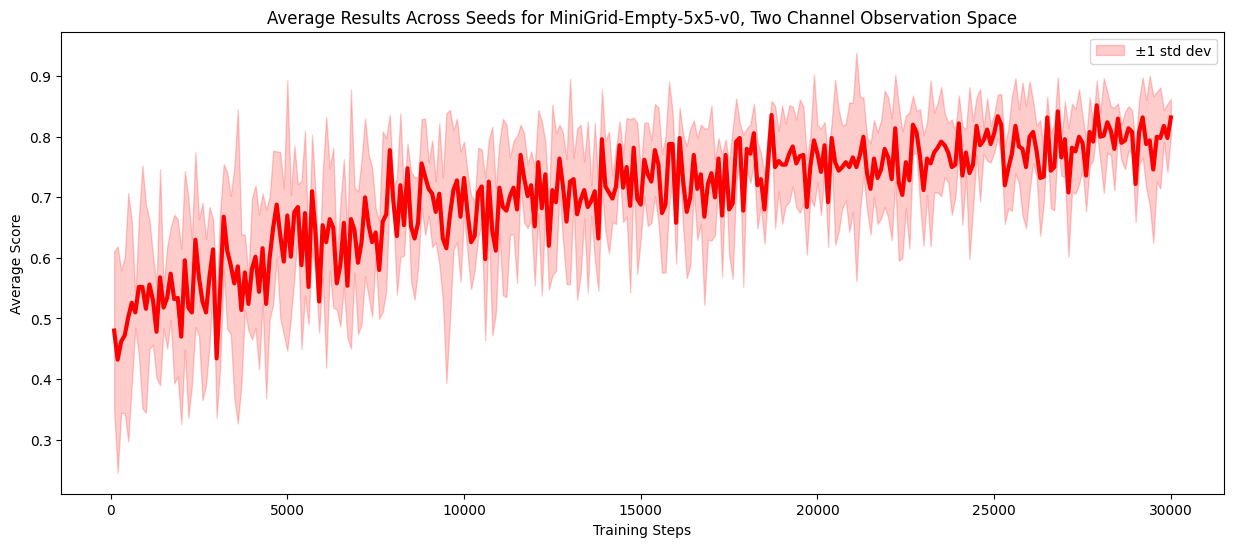

In [ ]:
plot_average(
    "vanilla_two_channel_16_processes",
    "Average Results Across Seeds for MiniGrid-Empty-5x5-v0, Two Channel Observation Space",
)


/var/folders/q4/2lsmb6qd1ks8137720rg8fz80000gn/T/ipykernel_38391/3440463019.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


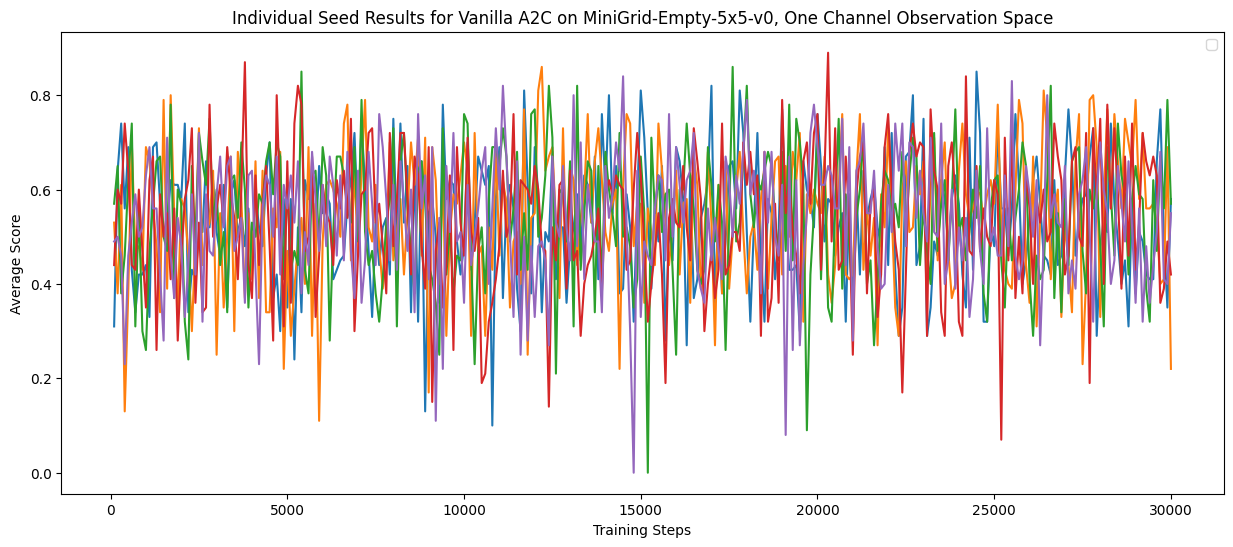

In [32]:
plot_seeded_results(
    "vanilla_one_channel_16_processes",
    "Individual Seed Results for Vanilla A2C on MiniGrid-Empty-5x5-v0, One Channel Observation Space",
)


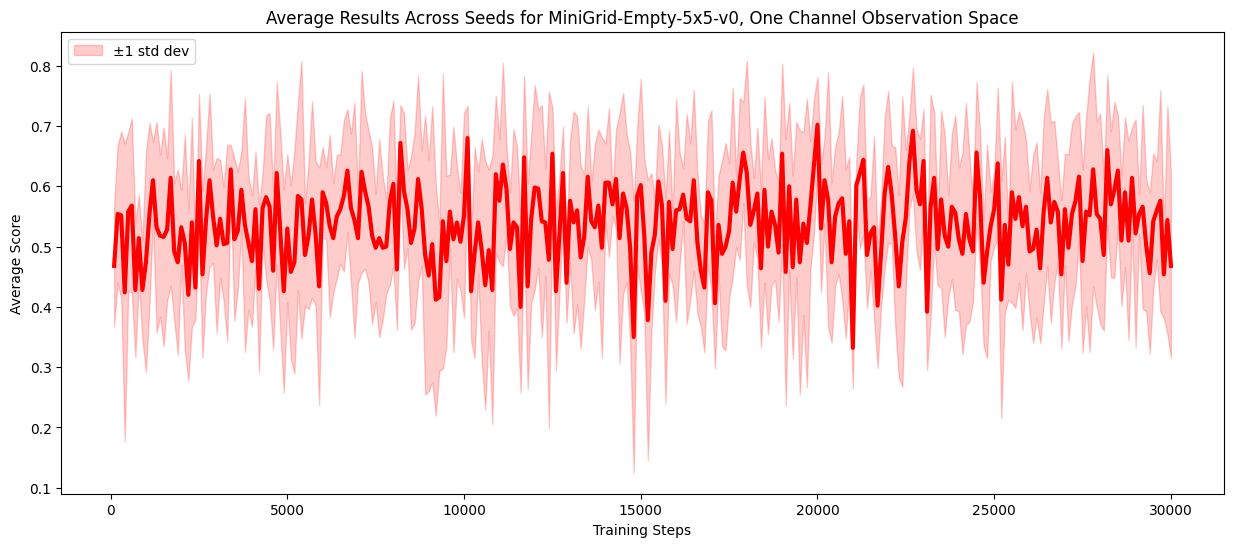

In [33]:
plot_average(
    "vanilla_one_channel_16_processes",
    "Average Results Across Seeds for MiniGrid-Empty-5x5-v0, One Channel Observation Space",
)

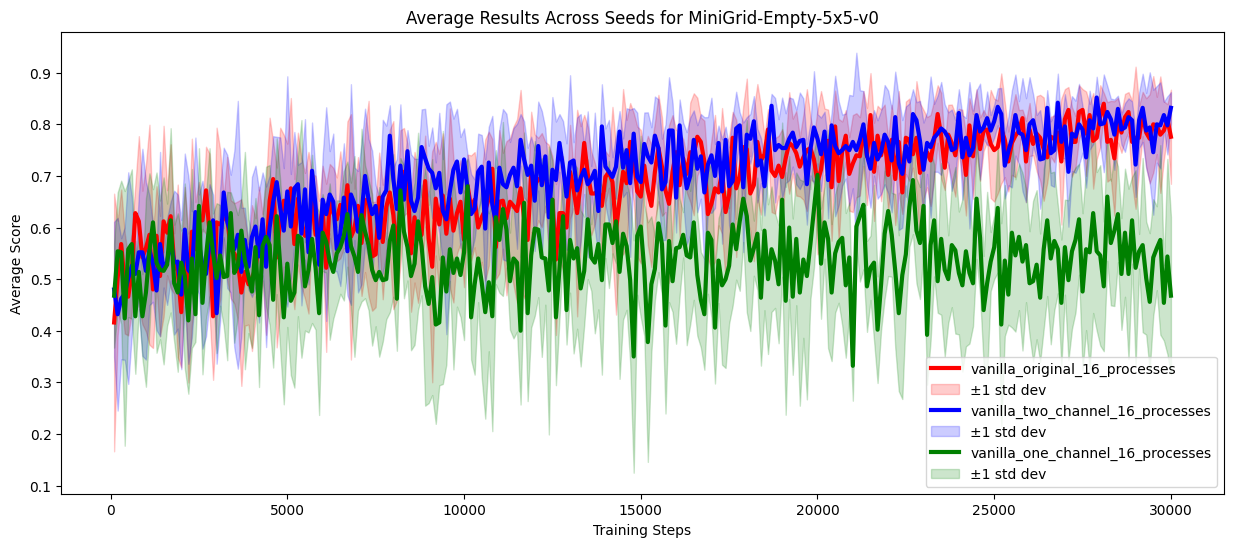

In [6]:
plot_multiple_averages(
    [
        "vanilla_original_16_processes",
        "vanilla_two_channel_16_processes",
        "vanilla_one_channel_16_processes",
    ],
    "Average Results Across Seeds for MiniGrid-Empty-5x5-v0",
)